# Using python to display and convert postscript files

## Goal
The goal of this notebook is to develop a way to convert postscript files into png and then arrange on a grid into a larger image.  The second goal is to use matplotlib to align the postscript (or png) images.  This was done to convert images generated by the ViennaRNA package to be displayed at one or to convert the files into png files for use in a presentation.

## Setting up the basics
Next couple of blocks are going to be "housekeeping" to load the required librarys, set the path or define functions. 

In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import os

In [2]:
#set the path
path = "./"

## Define the convert to png function
Once the path is set a function can be created to convert the postscript files into a standard graphic image like PNG or JPEG.  The basis of this function was a stackoverflow blog post (http://stackoverflow.com/questions/62053750/ddg#62054286)on converting images.  It is used later in this notebook as part of a loop from the file lists.

In [3]:
# Initial function from a stackoverflow to convert from ps to png
def convert_to_png(path,
                   file,
                   folder):
    img = Image.open(os.path.join(path, file))
    file = os.path.splitext(file)[0] + '.png'
    img.save(os.path.join(path, folder, file))

This function works but you need to modify path to have path and file name or loop accross the ps file to a function.  To do this one way is to determine what is in the directory.  

## Checking the files in the directory.
In the next group of blocks we are looking at the contents of the directory and then making a file_list with only postscript files

In [4]:
# Quick look into the directory to see exactly what files are present
file_list = os.listdir(path)
print(file_list)

['lcl_NC_019843.3_cds_YP_009047208.1_7_ss.ps', 'MERS_cds_FASTA.txt', 'lcl_NC_019843.3_cds_YP_009047207.1_6_ss.ps', 'composite_figure.png', 'NC019843_cds', 'lcl_NC_019843.3_cds_YP_009047211.1_10_ss.ps', 'lcl_NC_019843.3_cds_YP_009047205.1_4_ss.ps', 'lcl_NC_019843.3_cds_YP_009047210.1_9_ss.ps', 'test_secondarystuc.png', 'lcl_NC_019843.3_cds_YP_009047212.1_11_ss.ps', 'NC_019843_mers_complete.fasta', 'MERS_cds', 'lcl_NC_019843.3_cds_YP_009047204.1_3_ss.ps', 'MERS_RNA_secondarystuc.png', 'test_save.png', 'lcl_NC_019843.3_cds_YP_009047209.1_8_ss.ps', 'lcl_NC_019843.3_cds_YP_009047206.1_5_ss.ps', '.ipynb_checkpoints', 'lcl_NC_019843.3_cds_YP_009047202.1_1_ss.ps', 'NC_019843.3_ss.ps', 'lcl_NC_019843.3_cds_YP_009047203.1_2_ss.ps', 'RNAfoldimage_display.ipynb']


Looking at this directory there is more than just the postscript (ps) file.  To create a ps filelist only a simple if statement that is added to the file_list var is done.  There are other methods (i.e. glob) but this is easy to do with the os library.

In [5]:
#Making a list of files with the .ps ending
file_list = []

for file in os.listdir(path):
    if file.endswith('.ps'):
        file_list.append(file)
print(file_list)

['lcl_NC_019843.3_cds_YP_009047208.1_7_ss.ps', 'lcl_NC_019843.3_cds_YP_009047207.1_6_ss.ps', 'lcl_NC_019843.3_cds_YP_009047211.1_10_ss.ps', 'lcl_NC_019843.3_cds_YP_009047205.1_4_ss.ps', 'lcl_NC_019843.3_cds_YP_009047210.1_9_ss.ps', 'lcl_NC_019843.3_cds_YP_009047212.1_11_ss.ps', 'lcl_NC_019843.3_cds_YP_009047204.1_3_ss.ps', 'lcl_NC_019843.3_cds_YP_009047209.1_8_ss.ps', 'lcl_NC_019843.3_cds_YP_009047206.1_5_ss.ps', 'lcl_NC_019843.3_cds_YP_009047202.1_1_ss.ps', 'NC_019843.3_ss.ps', 'lcl_NC_019843.3_cds_YP_009047203.1_2_ss.ps']


Notice in this list there is only ps files!  Now that the file we want to arrange into a figure or convert are done.  The next step is to see how many files are present.

In [6]:
# Next basic step is determine number of ps files 

len(file_list)



12

## Making an array of postscript image files for a composite figure using matplotlib

The length len() of the file_list can now be used to determine rows by columns for the plt.figure.  In this example four-rows by three columns was used.  One additional point, the image files were not converted (yet).  This plot will use the ps files then save the plot as a png figure.  

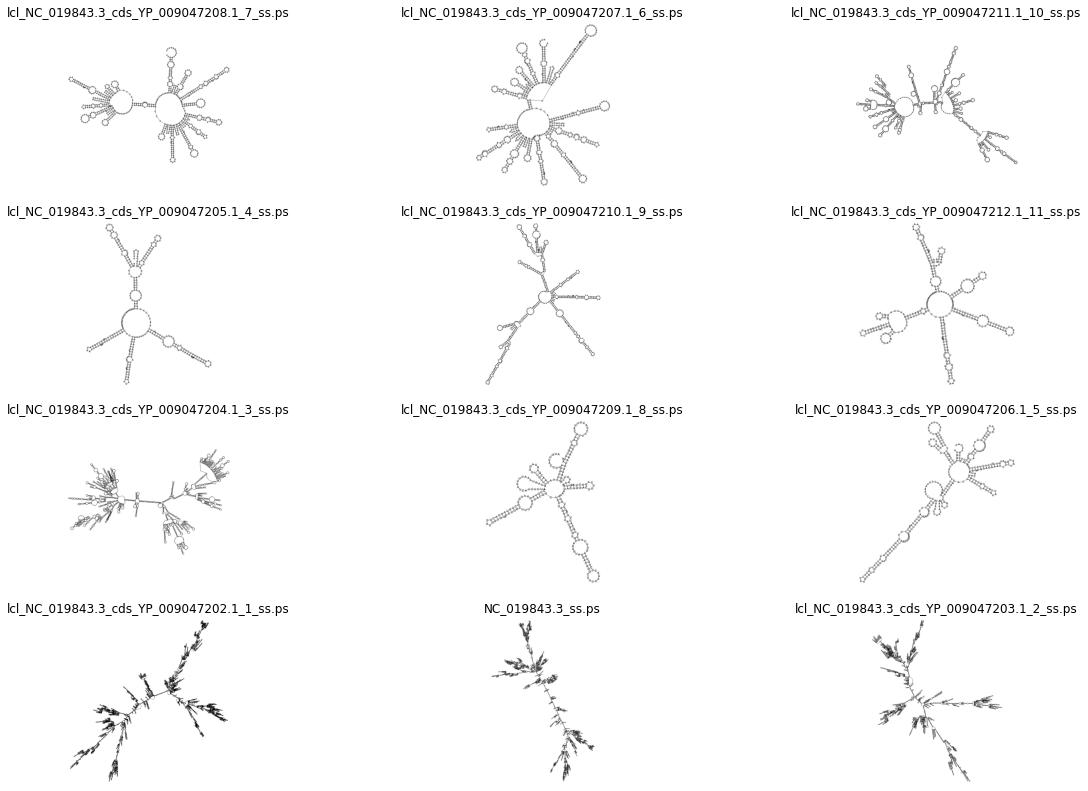

In [7]:
# Set the figure size
fig = plt.figure(figsize=(20, 14))
# Set the number of rows and columns
rows = 4
columns =3 

# Initialize the index var used for the add sub_plot
index = 1
# Begin the for loop accross the file_list
for x in file_list:
    img = Image.open(x)
    fig.add_subplot(rows, columns, index)
    plt.imshow(img)
    plt.axis('off')
    plt.title(x)
    index = index + 1
#Save the plot    
plt.savefig("composite_figure.png")
    

## Converting the postscript files into png files 

In [8]:
# Make a new directory.  NOTE: will need to delete if one already exists. Or add a check for directory first.
os.makedirs(os.path.join(path, "png_figures"))


for x in file_list:
    convert_to_png(path, x, "png_figures")
    

Now that files have been converted the next step is to check the contents of the new directory

In [9]:
print(os.listdir(os.path.join(path, "png_figures")))

['lcl_NC_019843.3_cds_YP_009047204.1_3_ss.png', 'lcl_NC_019843.3_cds_YP_009047212.1_11_ss.png', 'lcl_NC_019843.3_cds_YP_009047210.1_9_ss.png', 'lcl_NC_019843.3_cds_YP_009047207.1_6_ss.png', 'NC_019843.3_ss.png', 'lcl_NC_019843.3_cds_YP_009047203.1_2_ss.png', 'lcl_NC_019843.3_cds_YP_009047202.1_1_ss.png', 'lcl_NC_019843.3_cds_YP_009047208.1_7_ss.png', 'lcl_NC_019843.3_cds_YP_009047206.1_5_ss.png', 'lcl_NC_019843.3_cds_YP_009047211.1_10_ss.png', 'lcl_NC_019843.3_cds_YP_009047209.1_8_ss.png', 'lcl_NC_019843.3_cds_YP_009047205.1_4_ss.png']
